necessary librabies

In [1]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import  CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

import nltk
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import wordnet
from nltk import word_tokenize


nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


downloading the dataset

In [2]:
!wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv

File ‘bbc_text_cls.csv’ already there; not retrieving.



In [3]:
df = pd.read_csv('bbc_text_cls.csv')
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [4]:
inputs = df['text']
labels = df['labels']

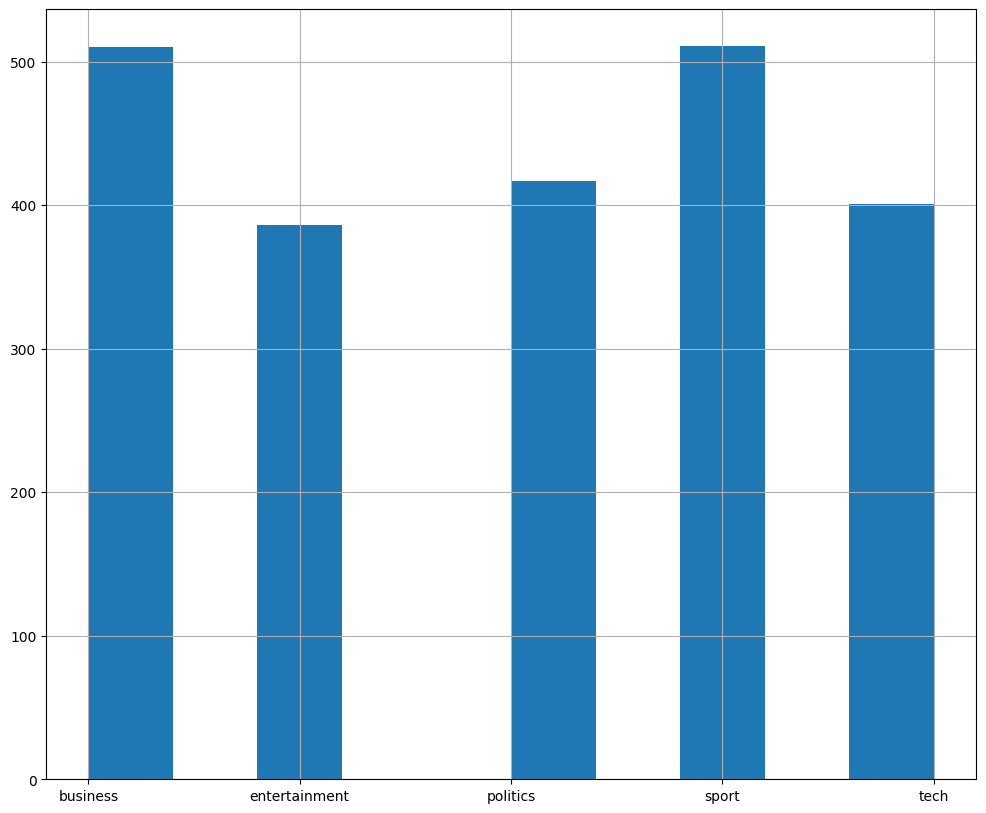

In [5]:
labels.hist(figsize=(12,10));

In [6]:
inputs_train, inputs_test, y_train, y_test = train_test_split(inputs,labels,random_state=42)

In [7]:
vectorizer = CountVectorizer()

In [8]:
X_train = vectorizer.fit_transform(inputs_train)
X_test = vectorizer.transform(inputs_test)

In [9]:
X_train

<1668x26157 sparse matrix of type '<class 'numpy.int64'>'
	with 337538 stored elements in Compressed Sparse Row format>

In [10]:
(X_train !=0).sum()

337538

In [11]:
# What percentage ofvalues are non-zero?
(X_train !=0).sum() / np.prod(X_train.shape)

0.00773639604201488

In [12]:
model = MultinomialNB()
model.fit(X_train,y_train)

print('train_score:',model.score(X_train,y_train))
print('test_score:',model.score(X_test,y_test))


train_score: 0.9952038369304557
test_score: 0.9712746858168761


In [13]:
# with stopwords

vectorizer = CountVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(inputs_train)
X_test = vectorizer.transform(inputs_test)

model = MultinomialNB()
model.fit(X_train,y_train)
print('train_score:',model.score(X_train,y_train))
print('test_score:',model.score(X_test,y_test))


train_score: 0.9964028776978417
test_score: 0.9712746858168761


In [14]:
def get_wordnet_pos(tag):
    if tag.startswith('N'):
        return wordnet.NOUN # Noun
    elif tag.startswith('V'):
        return wordnet.VERB # Verb
    elif tag.startswith('R'):
        return wordnet.ADV # Adverb
    elif tag.startswith('J'):
        return wordnet.ADJ  # Adjective
    else:
        return wordnet.NOUN  # Default to noun if the tag is not recognized


In [15]:
class LemmaTokenizer:
  def __init__(self):
    self.wnl = WordNetLemmatizer()
  def __call__(self,doc):
     tokens = word_tokenize(doc)
     words_and_tags = nltk.pos_tag(tokens)
     return [self.wnl.lemmatize(word, pos=get_wordnet_pos(tag)) for word, tag in words_and_tags]

In [16]:
# With lemmatiazation
vectorizer = CountVectorizer(tokenizer=LemmaTokenizer())
X_train = vectorizer.fit_transform(inputs_train)
X_test = vectorizer.transform(inputs_test)


model = MultinomialNB()
model.fit(X_train,y_train)
print('train_score:',model.score(X_train,y_train))
print('test_score:',model.score(X_test,y_test))

train_score: 0.9928057553956835
test_score: 0.9694793536804309


In [17]:
class StemTokenizer:
  def __init__(self):
    self.porter = PorterStemmer()
  def __call__(self,doc):
     tokens = word_tokenize(doc)
     words_and_tags = nltk.pos_tag(tokens)
     return [self.porter.stem(t) for t in tokens]

In [18]:
# With stemming
vectorizer = CountVectorizer(tokenizer=StemTokenizer())
X_train = vectorizer.fit_transform(inputs_train)
X_test = vectorizer.transform(inputs_test)


model = MultinomialNB()
model.fit(X_train,y_train)
print('train_score:',model.score(X_train,y_train))
print('test_score:',model.score(X_test,y_test))

train_score: 0.9922062350119905
test_score: 0.9712746858168761


In [19]:
def simple_tokenizer(s):
  return s.split()

In [20]:
# String split tokenizer
vectorizer = CountVectorizer(tokenizer=simple_tokenizer)
X_train = vectorizer.fit_transform(inputs_train)
X_test = vectorizer.transform(inputs_test)

model = MultinomialNB()
model.fit(X_train,y_train)
print('train_score:',model.score(X_train,y_train))
print('test_score:',model.score(X_test,y_test))


train_score: 0.9988009592326139
test_score: 0.9587073608617595


In [21]:
X_train.size

368968

In [22]:
X_test.size

112585